## **Guilherme Morone Araujo - gma2**

# Aplicação do Método dos Momentos para determinar a distribuição superficial de carga nas placas abaixo

![placas](picture.jpg)

In [235]:
# Importando as bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import math

In [236]:
# Variáveis iniciais

Vi = 0          # Potencial da placa em z = 0
V0 = 1          # Potencial da placa em z = d
L = 0.1         # Lado = 10 cm
d = 0.001       # distancia entre as placas condutoras = 1 mm
e0 = 8.85e-12   # Permissividade no vácuo
N = 10          # Número de segmentos
delta = L/N     # Tamanho do lado de cada elemento 
                # Cada lado é divido em N segmentos, totalizando N² elementos

In [237]:
# Matriz para as coordenadas do centro de cada elemento (x, y, z)
# A matriz vai ter 2 * N² elementos (duas placas condutoras)

R = []

for k in range(2):
    for i in range(N):
        for j in range(N):
            R.append([(j * delta) + (delta/2), (i * delta) + (delta/2), k * d])   

# Printando a matriz
for i in range(2 * N**2):
    for j in range(3):
        print(round(R[i][j], 3), end = ' ') # Arredondamento apenas para facilitar a visualização
    print()

0.005 0.005 0.0 
0.015 0.005 0.0 
0.025 0.005 0.0 
0.035 0.005 0.0 
0.045 0.005 0.0 
0.055 0.005 0.0 
0.065 0.005 0.0 
0.075 0.005 0.0 
0.085 0.005 0.0 
0.095 0.005 0.0 
0.005 0.015 0.0 
0.015 0.015 0.0 
0.025 0.015 0.0 
0.035 0.015 0.0 
0.045 0.015 0.0 
0.055 0.015 0.0 
0.065 0.015 0.0 
0.075 0.015 0.0 
0.085 0.015 0.0 
0.095 0.015 0.0 
0.005 0.025 0.0 
0.015 0.025 0.0 
0.025 0.025 0.0 
0.035 0.025 0.0 
0.045 0.025 0.0 
0.055 0.025 0.0 
0.065 0.025 0.0 
0.075 0.025 0.0 
0.085 0.025 0.0 
0.095 0.025 0.0 
0.005 0.035 0.0 
0.015 0.035 0.0 
0.025 0.035 0.0 
0.035 0.035 0.0 
0.045 0.035 0.0 
0.055 0.035 0.0 
0.065 0.035 0.0 
0.075 0.035 0.0 
0.085 0.035 0.0 
0.095 0.035 0.0 
0.005 0.045 0.0 
0.015 0.045 0.0 
0.025 0.045 0.0 
0.035 0.045 0.0 
0.045 0.045 0.0 
0.055 0.045 0.0 
0.065 0.045 0.0 
0.075 0.045 0.0 
0.085 0.045 0.0 
0.095 0.045 0.0 
0.005 0.055 0.0 
0.015 0.055 0.0 
0.025 0.055 0.0 
0.035 0.055 0.0 
0.045 0.055 0.0 
0.055 0.055 0.0 
0.065 0.055 0.0 
0.075 0.055 0.0 
0.085 0.055 0.

# Primeira questão

In [238]:
# Matriz de impedância

def impendancia(m, n):
    if m != n:
        # 1/(4 * pi * e0) * delta²/sqrt[(xp - xi)² + (yq - yj)² + (zs - zk)²]
        return 1/(4 * math.pi * e0) * (delta**2)/math.sqrt(((R[m][0] - R[n][0])**2) + ((R[m][1] - R[n][1])**2) + ((R[m][2] - R[n][2])**2))
    
    # [delta/(pi * e0)] * ln(1 + sqrt(2))
    return delta/(math.pi * e0) * math.log(1 + math.sqrt(2))
    
Z = []
    
for i in range(2 * N**2):
    Z.append([])
    for j in range(2 * N**2):
        Z[i].append(impendancia(i, j))
  
# Printando a matriz
#for i in range(2 * N**2):
#    for j in range(2 * N**2):
#        print(Z[i][j], end = ' ')
#    print()

In [239]:
# Matriz de tensão (potencial)

V = []

for i in range(N**2): # Placa condutora em z = 0
    V.append(Vi)
    
for i in range(N**2, 2 * N**2): # Placa condutora em z = d
    V.append(V0)
    
# Printando a matriz
for i in range(2 * N**2):
    print(V[i], end = ' ')


0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

# Segunda questão

In [240]:
# Resolvendo o sistema para determinar as amplitudes dos pulsos

A = np.linalg.solve(Z, V)

# Cada elemento de A terá uma solução para cada parte dividida da placa condutora (que está em R)

print(A)

[ 1.02534930e-09  9.91166288e-10  9.79841212e-10  9.74599244e-10
  9.72405235e-10  9.72405235e-10  9.74599244e-10  9.79841212e-10
  9.91166288e-10  1.02534930e-09  9.91166288e-10  9.54532313e-10
  9.43401100e-10  9.38638980e-10  9.36725983e-10  9.36725983e-10
  9.38638980e-10  9.43401100e-10  9.54532313e-10  9.91166288e-10
  9.79841212e-10  9.43401100e-10  9.32020495e-10  9.27177424e-10
  9.25251499e-10  9.25251499e-10  9.27177424e-10  9.32020495e-10
  9.43401100e-10  9.79841212e-10  9.74599244e-10  9.38638980e-10
  9.27177424e-10  9.22257513e-10  9.20297896e-10  9.20297896e-10
  9.22257513e-10  9.27177424e-10  9.38638980e-10  9.74599244e-10
  9.72405235e-10  9.36725983e-10  9.25251499e-10  9.20297896e-10
  9.18320037e-10  9.18320037e-10  9.20297896e-10  9.25251499e-10
  9.36725983e-10  9.72405235e-10  9.72405235e-10  9.36725983e-10
  9.25251499e-10  9.20297896e-10  9.18320037e-10  9.18320037e-10
  9.20297896e-10  9.25251499e-10  9.36725983e-10  9.72405235e-10
  9.74599244e-10  9.38638

In [241]:
# A distribuição superficial de carga pode ser aproximada por uma soma dos elementos do vetor A

distribuicaoSuperficial = sum(A)
print("Distribuição superficial de carga =", distribuicaoSuperficial)

Distribuição superficial de carga = 1.7538176039518793e-08


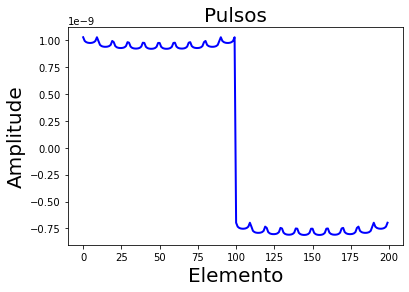

In [242]:
# Resultado, gráfico da amplitude dos pulsos

plt.title('Pulsos', fontsize=20)
plt.xlabel('Elemento', fontsize=20) # Elemento = parte da placa dividida pelo segmento (N)
plt.ylabel('Amplitude', fontsize=20) # Valor esperado
plt.plot(A, color='blue', linewidth='2')
plt.show() 